In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import linear_model
import missingno as msno

In [3]:
data= pd.read_csv("C:/Users/PQ/Desktop/data.csv")

In [4]:
data.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [5]:
#Data information in the first five columns and the last five columns
data.head() , data.tail()

(   mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
 0   85       92    45    27       31     0.0         1
 1   85       64    59    32       23     0.0         2
 2   86       54    33    16       54     0.0         2
 3   91       78    34    24       36     0.0         2
 4   87       70    12    28       10     0.0         2,
      mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
 340   99       75    26    24       41    12.0         1
 341   96       69    53    43      203    12.0         2
 342   98       77    55    35       89    15.0         1
 343   91       68    27    26       14    16.0         1
 344   98       99    57    45       65    20.0         1)

In [6]:
data.shape

(345, 7)

In [7]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'], dtype='object')

In [8]:
#correlation between features
data.corr()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680,-0.091070
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796,-0.098050
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848,-0.035009
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588,0.157356
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224,0.146393
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000,-0.022049
selector,-0.091070,-0.098050,-0.035009,0.157356,0.146393,-0.022049,1.000000


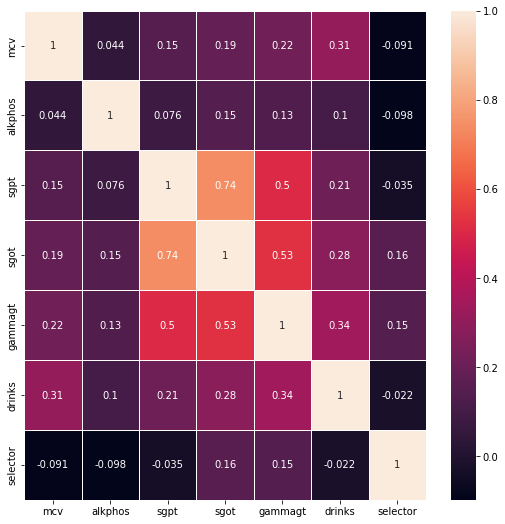

In [9]:
plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5)
plt.show()

get a quick overview of correlated features


it seems sgot and sgpt have a highest correlation(0.74) , alkphos and selector have a lowest correlation(-0.098)

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


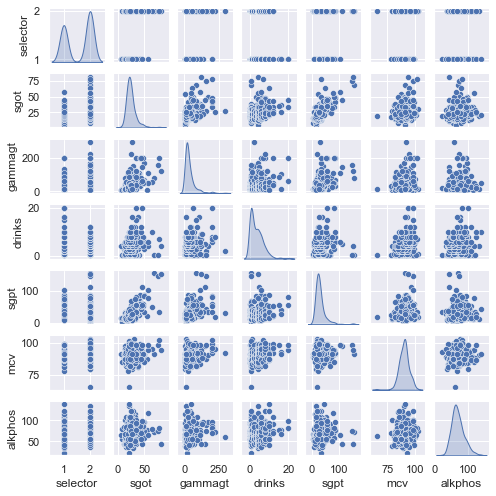

In [10]:
sns.set()
columns = ['selector','sgot','gammagt','drinks','sgpt','mcv','alkphos']
sns.pairplot(data[columns],size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()

selector has divided the data of different features into two parts. As stated in bupa.names selector is a field used to split data into two sets.There is a linear correlation between sgpt and sgot

Text(0, 0.5, 'Frequency')

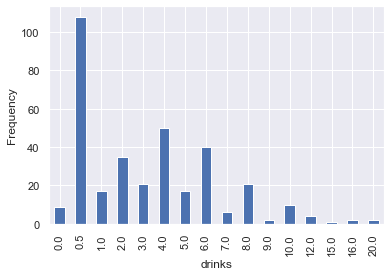

In [11]:
count_drinks = pd.value_counts(data['drinks'], sort = True).sort_index()
count_drinks.plot(kind = 'bar')
plt.xlabel("drinks")
plt.ylabel("Frequency")

according to the figure in 0.5 drinks have a highest frequency

c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:4343: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
c:\Users\PQ\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1867: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


<AxesSubplot:title={'center':'Log Normal'}, xlabel='drinks'>

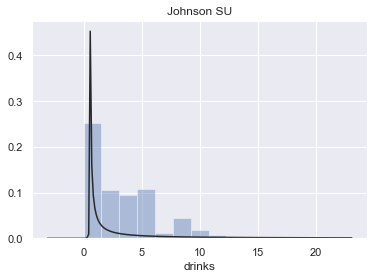

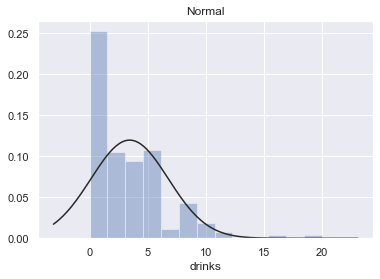

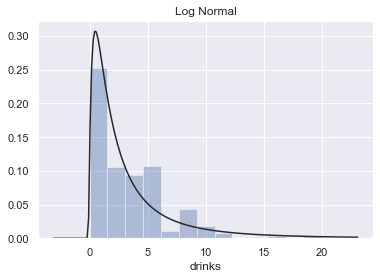

In [12]:
y = data['drinks']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [13]:
data.skew() , data.kurt()

(mcv        -0.388433
 alkphos     0.753667
 sgpt        3.063499
 sgot        2.293072
 gammagt     2.866094
 drinks      1.543819
 selector   -0.324383
 dtype: float64,
 mcv          2.584958
 alkphos      0.747883
 sgpt        13.813912
 sgot         8.140165
 gammagt     10.476749
 drinks       3.663388
 selector    -1.905858
 dtype: float64)

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

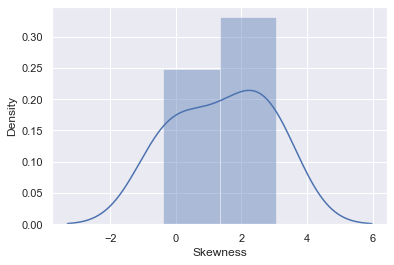

In [14]:
sns.distplot(data.skew(),axlabel ='Skewness')

Scatter plots between the most correlated variables

<AxesSubplot:xlabel='sgot', ylabel='drinks'>

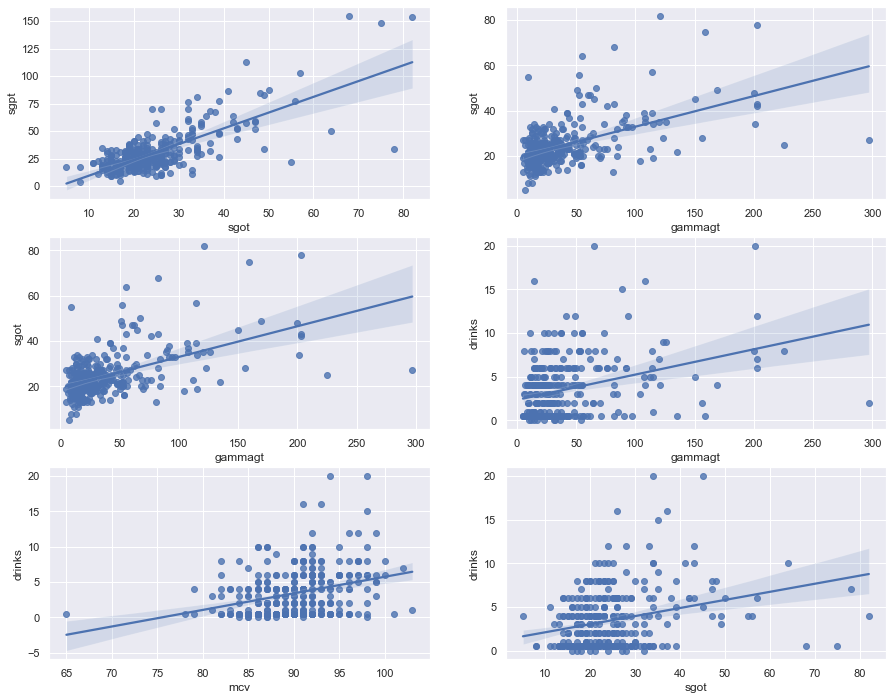

In [15]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
scatter_plot=pd.concat([data['sgpt'],data['sgot']],axis = 1)
sns.regplot(x='sgot',y = 'sgpt',data = scatter_plot,scatter= True, fit_reg=True, ax=ax1)
scatter_plot = pd.concat([data['sgot'],data['gammagt']],axis = 1)
sns.regplot(x='gammagt',y = 'sgot',data = scatter_plot,scatter= True, fit_reg=True, ax=ax2)
scatter_plot = pd.concat([data['sgot'],data['gammagt']],axis = 1)
sns.regplot(x='gammagt',y = 'sgot',data =scatter_plot,scatter= True, fit_reg=True, ax=ax3)
scatter_plot = pd.concat([data['drinks'],data['gammagt']],axis = 1)
sns.regplot(x='gammagt',y = 'drinks',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)
scatter_plot = pd.concat([data['drinks'],data['mcv']],axis = 1)
sns.regplot(x='mcv',y = 'drinks',data = scatter_plot,scatter= True, fit_reg=True, ax=ax5)
scatter_plot = pd.concat([data['drinks'],data['sgot']],axis = 1)
sns.regplot(x='sgot',y = 'drinks',data = scatter_plot,scatter= True, fit_reg=True, ax=ax6)



In [16]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
mcv,0,0.0
alkphos,0,0.0
sgpt,0,0.0
sgot,0,0.0
gammagt,0,0.0
drinks,0,0.0
selector,0,0.0


no missing data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drinks    345 non-null    float64
 6   selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


#LinearRegression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
shape=data.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 345 rows and 7 columns


In [20]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [22]:
X_train.shape , y_train.shape

((276, 4), (276,))

In [23]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (276, 4)
X_test: (69, 4)
Y_train: (276,)
Y_test: (69,)


In [24]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train);

In [25]:
y_pred=lin_reg.predict(X_test)

In [26]:
from sklearn import metrics as met
pred = lin_reg.predict(X_test)


mae=met.mean_absolute_error(y_test, y_pred)
mse=met.mean_squared_error(y_test, y_pred)
r2=met.r2_score(y_test, y_pred)

print ("MAE: {}".format(mae))
print ("MSE: {}".format(mse))
print ("R2: {}".format(r2))

MAE: 21.534987097516
MSE: 1763.617879103414
R2: 0.23714264925911366


In [27]:
x = np.asanyarray(data[['sgot','alkphos','mcv','gammagt']])
y = np.asanyarray(data[['drinks']])
lin_reg.fit(x,y)

print('Coefficients: ', lin_reg.coef_)

Coefficients:  [[0.03642415 0.00806638 0.18033191 0.01904225]]
